# Case Study: Calculating Normality of Stock Market Returns
We will examine the returns of different stocks to determine if their daily returns follow a normal distribution. Before we begin you will have to install the **requests** library which simplifies the process of making a web request. We will be making a request to get data from the [IEX developer platform][1]. They have an excellent an easy-to-use API to retrieve market data for free (up to 100 requests per second).

### Using the requests library
The simplest use of the requests library is to retrieve data from another website. You simply pass the URL as a string to the **`get`** function. The returned object stores the data as a string in the **`text`** attribute. The requests library comes standard with the Anaconda distribution, so you should already have it. It is a third-party library, but a very popular one.

### Using the IEX API
The IEX API is fairly straightforward to use and there are several examples that you can view to understand how it works. The base URL of the API is `https://api.iextrading.com/1.0` which can be [seen here in the docs][2]. If you scroll down from the last link, you will see how the API is used. Each **endpont** is documented. Let's use the [chart endpoint][3].

We simply append **`/stock/{symbol}/chart/{range}`** to the base URL and put the stock symbol and range of data we want (without the curly braces) to retrieve historical stock price data. Go to the docs to view the available ranges.

Let's retrieve the last 5 years of Amazon data (symbol AMZN) by passing our endpoint to the **`get`** function. A requests **`Response`** object is returned.

[1]: https://iextrading.com/developer/
[2]: https://iextrading.com/developer/docs/#endpoints
[3]: https://iextrading.com/developer/docs/#chart

In [1]:
import requests
import pandas as pd

In [2]:
req = requests.get('https://api.iextrading.com/1.0/stock/AMZN/chart/5y')
type(req)

requests.models.Response

### Output the `text`
The response is captured as a Python string assigned to the **`text`** attribute. Let's print out the first 1,000 characters.

In [3]:
req.text[:1000]

'[{"date":"2013-07-22","open":309.25,"high":309.25,"low":302,"close":303.48,"volume":2520663,"unadjustedVolume":2520663,"change":-1.75,"changePercent":-0.573,"vwap":304.3156,"label":"Jul 22, 13","changeOverTime":0},{"date":"2013-07-23","open":303.16,"high":305.06,"low":300.56,"close":301.06,"volume":1999344,"unadjustedVolume":1999344,"change":-2.42,"changePercent":-0.797,"vwap":302.2476,"label":"Jul 23, 13","changeOverTime":-0.007974166337155713},{"date":"2013-07-24","open":303.02,"high":303.84,"low":298.04,"close":298.94,"volume":1999684,"unadjustedVolume":1999684,"change":-2.12,"changePercent":-0.704,"vwap":300.0688,"label":"Jul 24, 13","changeOverTime":-0.01495979965730862},{"date":"2013-07-25","open":299,"high":304.5,"low":296.75,"close":303.4,"volume":5394295,"unadjustedVolume":5394295,"change":4.46,"changePercent":1.492,"vwap":299.8534,"label":"Jul 25, 13","changeOverTime":-0.00026360880453420627},{"date":"2013-07-26","open":299.55,"high":313.62,"low":295.55,"close":312.01,"volum

### Reading JSON objects
Most APIs will respond with JSON data, a standardized format of data that is very similar to a Python dictionary with key-value pairs. This particular JSON data is returned as a list of dictionaries. We can usually read in an API response with the **`read_json`** pandas function. A DataFrame is created and usually pandas identifies the correct data types for us.

In [4]:
amzn = pd.read_json(req.text)
amzn.head()

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap
0,-1.75,0.000000,-0.573,303.48,2013-07-22,309.25,"Jul 22, 13",302.00,309.25,2520663,2520663,304.3156
1,-2.42,-0.007974,-0.797,301.06,2013-07-23,305.06,"Jul 23, 13",300.56,303.16,1999344,1999344,302.2476
2,-2.12,-0.014960,-0.704,298.94,2013-07-24,303.84,"Jul 24, 13",298.04,303.02,1999684,1999684,300.0688
3,4.46,-0.000264,1.492,303.40,2013-07-25,304.50,"Jul 25, 13",296.75,299.00,5394295,5394295,299.8534
4,8.61,0.028107,2.838,312.01,2013-07-26,313.62,"Jul 26, 13",295.55,299.55,8817434,8817434,306.7581


### Verify data types
It's very important to verify that Pandas chose the correct data types. A common occurrence is for a column that looks like it contains numeric data to be actually kept as a string.

Looking below, the data types seem to all be correct, save for **`label`**, which appears to be just a duplicate of the date column. We are good to continue.

In [5]:
amzn.dtypes

change                     float64
changeOverTime             float64
changePercent              float64
close                      float64
date                datetime64[ns]
high                       float64
label                       object
low                        float64
open                       float64
unadjustedVolume             int64
volume                       int64
vwap                       float64
dtype: object

### Put date in index
The date is a good choice as an index since it uniquely labels each row:

In [6]:
amzn = amzn.set_index('date')
amzn.head()

,change,changeOverTime,changePercent,close,high,label,low,open,unadjustedVolume,volume,vwap
date,,,,,,,,,,,
2013-07-22,-1.75,0.000000,-0.573,303.48,309.25,"Jul 22, 13",302.00,309.25,2520663,2520663,304.3156
2013-07-23,-2.42,-0.007974,-0.797,301.06,305.06,"Jul 23, 13",300.56,303.16,1999344,1999344,302.2476
2013-07-24,-2.12,-0.014960,-0.704,298.94,303.84,"Jul 24, 13",298.04,303.02,1999684,1999684,300.0688
2013-07-25,4.46,-0.000264,1.492,303.40,304.50,"Jul 25, 13",296.75,299.00,5394295,5394295,299.8534
2013-07-26,8.61,0.028107,2.838,312.01,313.62,"Jul 26, 13",295.55,299.55,8817434,8817434,306.7581


### Grabbing a single column of data
For this problem, we are only interested in the closing price. To get the **close** column, we pass the column name to the indexing operator.

In [7]:
# Get closing price
close = amzn['close']
close.head(10)

date
2013-07-22    303.48
2013-07-23    301.06
2013-07-24    298.94
2013-07-25    303.40
2013-07-26    312.01
2013-07-29    306.10
2013-07-30    302.41
2013-07-31    301.22
2013-08-01    305.57
2013-08-02    304.21
Name: close, dtype: float64

In [8]:
# we are back to a Series
type(close)

pandas.core.series.Series

### Daily percent change
Pandas Series has a nifty method called **`pct_change`** which returns the percentage difference between the current and previous elements.

In [9]:
# calculate percent change
close_change = close.pct_change()
close_change.head(10)

date
2013-07-22         NaN
2013-07-23   -0.007974
2013-07-24   -0.007042
2013-07-25    0.014919
2013-07-26    0.028378
2013-07-29   -0.018942
2013-07-30   -0.012055
2013-07-31   -0.003935
2013-08-01    0.014441
2013-08-02   -0.004451
Name: close, dtype: float64

### Dataset already has a percent change column
The dataset already contains a percent column. We can manually verify that they are equivalent (after taking the percentage into consideration).

In [10]:
amzn['changePercent'].head(10)

date
2013-07-22   -0.573
2013-07-23   -0.797
2013-07-24   -0.704
2013-07-25    1.492
2013-07-26    2.838
2013-07-29   -1.894
2013-07-30   -1.205
2013-07-31   -0.394
2013-08-01    1.444
2013-08-02   -0.445
Name: changePercent, dtype: float64

### Handling Missing Value
The first date has a missing value since there was no previous date. The **`dropna`** method can be used to remove any NaN elements.

In [11]:
close_change = close_change.dropna()
close_change.head(10)

date
2013-07-23   -0.007974
2013-07-24   -0.007042
2013-07-25    0.014919
2013-07-26    0.028378
2013-07-29   -0.018942
2013-07-30   -0.012055
2013-07-31   -0.003935
2013-08-01    0.014441
2013-08-02   -0.004451
2013-08-05   -0.010585
Name: close, dtype: float64

### Checking for Normality
There are formal statistical tests for normality that can be used. Instead we will focus on simple data exploration to give us insight.

### Plotting the returns
The main plotting library in pandas is matplotlib which will be covered in greater detail in a later notebook. To output plots directly into the notebook the magic command **`%matplotlib inline`** must be executed first. 

In [12]:
%matplotlib inline

Pandas objects have hooks directly into matplotlib so it's not necessary to directly import matplotlib. The **`plot`** method can be used to create a number of different kinds of plots by using the **`kind`** parameter. We pass it the string **`hist`** to create a histogram, along with a histogram-specific argument **`bins`** to control the number of bars. We also change the size of the figure by passing a tuple to the **`figsize`** parameter.

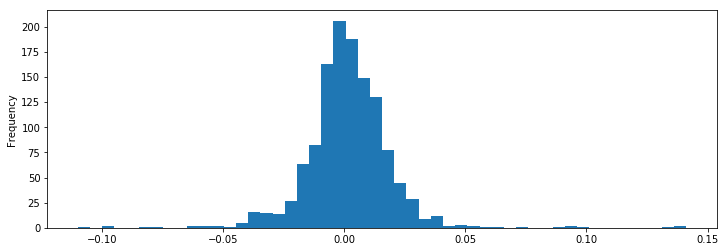

In [13]:
close_change.plot(kind='hist', bins=50, figsize=(12, 4))

### Use boolean selection to check for normality
The plot above is symmetrical and somewhat bell-shaped. It could possibly represent a normal distribution. To more formally check for normality we can count the number of observations that are within 1, 2, and 3 standard deviations. The [68-95-99.7 rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule) can be used to know if the data is approximately normal.

We first need to calculate the mean, standard deviation.

In [14]:
mean = close_change.mean()
std = close_change.std()

### Get absolute number of standard deviations from mean
To standardize our results we can find how many absolute standard deviations away from the mean each one is. To do this we subtract the mean from the entire Series, which returns a Series and then take the absolute value of this. We then divide by the standard deviation. This quantity is referred to a **z-score**.

In [15]:
z_score = (close_change - mean).abs() / std

### Find the percentage by taking the mean
We have seen in other notebooks, that taking the mean of a boolean Series gives us the percentage that are **`True`**. Let's do that here to find the percentage less than 1, 2, and 3 standard deviations:

In [16]:
# Get final results and round to 3 decimals
pct_within1 = round((z_score < 1).mean(), 3)
pct_within2 = round((z_score < 2).mean(), 3)
pct_within3 = round((z_score < 3).mean(), 3)

pct_within1, pct_within2, pct_within3

(0.813, 0.959, 0.985)

### Results Discussion
The percentages of returns within 1, 2 and 3 standard deviations are fairly far off the 68-95-99.7 rule. Much more of the data was concentrated around 1 standard deviation and several times as many returns than expected were greater than 3 standard deviations from the mean. This strongly suggests that a normal distribution would not be a good fit for this type of data.

### How to check the entire series for truth
Lets say we wanted to check if all the stock price returns were within 4 standard deviations from the mean. The **`all`** and **`any`** methods can be used to check Series of all boolean values.

In [17]:
# create a boolean Series checking values to be within 4 standard deviations
criteria = z_score < 4

# inspect criteria - the first 10 are true
criteria.head(10)

date
2013-07-23    True
2013-07-24    True
2013-07-25    True
2013-07-26    True
2013-07-29    True
2013-07-30    True
2013-07-31    True
2013-08-01    True
2013-08-02    True
2013-08-05    True
Name: close, dtype: bool

In [18]:
# now use all to check if they are all true. Looks like is at least one False
criteria.all()

False

In [19]:
# could do the same thing with 'any' method
# change criteria to be more than 4 std
criteria = z_score >= 4

criteria.any()

True

# Exercises
Solutions are in this notebook below the exercises.

### Problem 1
<span  style="color:green; font-size:16px">Use the requests library with the IEX API to return historical stock data for the automaker Tesla (TSLA) for the last year.</span>

In [20]:
# your code here

### Problem 2
<span  style="color:green; font-size:16px">Use one line of code (with method chaining) to find the daily percentage returns of TSLA and drop any missing values. Save the result to **`tsla_change`**.</span>

In [21]:
# your code here

### Problem 3
<span  style="color:green; font-size:16px">Find the mean daily return for Tesla. Then select the first and last closing prices. Also get the number of trading days. Store all four of these values into variables.</span>

In [22]:
# your code here

### Problem 4
<span  style="color:green; font-size:16px">If Tesla returned its mean percentage return every single day since the first day you have data, what would its last closing price be? Is it the same as the actual last closing price? You need to use all the variables calculated from problem 3.</span>

In [23]:
# your code here

### Problem 5
<span  style="color:green; font-size:16px">Find the raw number of standard deviations away from the mean for the Tesla daily returns. Save this to a variable **`z_score_raw`**. What is the max and minimum score?</span>

In [24]:
# your code here

### Problem 6
<span  style="color:green; font-size:16px">What percentage did Tesla stock increase when it had its highest maximum raw z-score?</span>

In [25]:
# your code here

### Problem 7
<span  style="color:green; font-size:16px">Create a function that accepts a stock ticker symbol (amzn for example) and returns the percentage of prices within 1, 2, and 3 standard deviations from the mean. Use your function to return results for different stocks (tsla, fb, slb, gm, etc...)</span>

In [26]:
# your code here

### Problem 8
<span  style="color:green; font-size:16px"> How many days did Tesla close above 100 and below 150?</span>

In [27]:
# your code here

### Problem 9
<span  style="color:green; font-size:16px"> How many days did Tesla close below 50 or above 200?</span>

In [28]:
# your code here

### Problem 10
<span  style="color:green; font-size:16px"> Lookup the definition for interquartile range and slice Tesla closing prices so it contains just the interquartile range. There are multiple ways to do this. Check the **`quantile`** method.</span>

In [29]:
# your code here

### Problem 11
<span  style="color:green; font-size:16px">Use the **`idxmax`** method to find the index label of the highest closing price. Find out how many trading days it has been since Tesla recorded it highest closing price.</span>

In [30]:
# your code here

# Solutions

### Problem 1
<span  style="color:green; font-size:16px">Use the requests library with the IEX API to return historical stock data for the automaker Tesla (TSLA) for the last year. Assign the closing price a a Series to `tsla_close`.</span>

In [31]:
req = requests.get('https://api.iextrading.com/1.0/stock/TSLA/chart/1y')
tsla = pd.read_json(req.text)
tsla = tsla.set_index('date')
tsla.head()

,change,changeOverTime,changePercent,close,high,label,low,open,unadjustedVolume,volume,vwap
date,,,,,,,,,,,
2017-07-21,-1.52,0.000000,-0.461,328.40,331.2575,"Jul 21, 17",325.80,329.46,4901606,4901606,328.7799
2017-07-24,14.12,0.042996,4.300,342.52,343.3990,"Jul 24, 17",330.01,330.24,8637082,8637082,339.4554
2017-07-25,-2.92,0.034105,-0.853,339.60,345.6000,"Jul 25, 17",334.15,345.00,6989197,6989197,338.7328
2017-07-26,4.25,0.047046,1.251,343.85,345.5000,"Jul 26, 17",338.12,340.36,4820790,4820790,342.9836
2017-07-27,-9.39,0.018453,-2.731,334.46,347.5000,"Jul 27, 17",326.29,346.00,8302405,8302405,338.0454


In [32]:
tsla_close = tsla['close']

### Problem 2
<span  style="color:green; font-size:16px">Use one line of code (with method chaining) to find the daily percentage returns of TSLA and drop any missing values. Save the result to **`tsla_change`**.</span>

In [33]:
tsla_change = tsla_close.pct_change().dropna()
tsla_change.head()

date
2017-07-24    0.042996
2017-07-25   -0.008525
2017-07-26    0.012515
2017-07-27   -0.027308
2017-07-28    0.001824
Name: close, dtype: float64

### Problem 3
<span  style="color:green; font-size:16px">Find the mean daily return for Tesla. Then select the first and last closing prices. Also get the number of trading days. Store all four of these values into variables.</span>

In [34]:
mean = tsla_change.mean()
first = tsla_close.iloc[0]
last = tsla_close.iloc[-1]
n = tsla_change.size
mean, first, last, n

(0.0001569883856368465, 328.4, 313.58, 251)

### Problem 4
<span  style="color:green; font-size:16px">If Tesla returned its mean percentage return every single day since the first day you have data, what would its last closing price be? Is it the same as the actual last closing price? You need to use all the variables calculated from problem 3.</span>

In [35]:
first * (mean + 1) ** n

341.59757730985

In [36]:
last

313.58

### Problem 5
<span  style="color:green; font-size:16px">Find the raw number of standard deviations away from the mean for the Tesla daily returns. Save this to a variable **`z_score_raw`**. What is the max and minimum score?</span>

In [37]:
std = tsla_change.std()
z_score_raw = (tsla_change - mean) / std
z_score_raw.head()

date
2017-07-24    1.637404
2017-07-25   -0.331844
2017-07-26    0.472337
2017-07-27   -1.049781
2017-07-28    0.063710
Name: close, dtype: float64

In [38]:
z_score_raw.max(), z_score_raw.min()

(3.7186469534675974, -3.304166510682128)

### Problem 6
<span  style="color:green; font-size:16px">What percentage did Tesla stock increase when it had its highest maximum raw z-score?</span>

In [39]:
tsla_change[z_score_raw == z_score_raw.max()]

date
2018-06-06    0.097448
Name: close, dtype: float64

### Problem 7
<span  style="color:green; font-size:16px">Create a function that accepts a stock ticker symbol (amzn for example) and a range and returns the percentage of prices within 1, 2, and 3 standard deviations from the mean. Use your function to return results for different stocks (tsla, fb, slb, gm, etc...)</span>

In [40]:
def stock_pct_finder(symbol, range):
    req = requests.get(f'https://api.iextrading.com/1.0/stock/{symbol}/chart/{range}')
    stock = pd.read_json(req.text)
    close = stock['close']
    close_change = close.pct_change().dropna()
    
    mean = close_change.mean()
    std = close_change.std()
    z_score = ((close_change - mean).abs() / std)
    
    pct_within1 = (z_score < 1).mean()
    pct_within2 = (z_score < 2).mean()
    pct_within3 = (z_score < 3).mean()

    return pct_within1, pct_within2, pct_within3

In [41]:
stock_pct_finder('AMZN', '5y')

(0.812549642573471, 0.9594916600476568, 0.9849086576648134)

In [42]:
stock_pct_finder('fb', '1y')

(0.7768924302788844, 0.9442231075697212, 0.9880478087649402)

In [43]:
stock_pct_finder('slb', '1y')

(0.7928286852589641, 0.9721115537848606, 0.9880478087649402)

In [44]:
stock_pct_finder('tsla', '1y')

(0.7250996015936255, 0.9442231075697212, 0.9880478087649402)

### Problem 8
<span  style="color:green; font-size:16px"> How many days did Tesla close above 300 and below 350?</span>

In [45]:
criteria = (tsla_close > 300) & (tsla_close < 350)

#inspect data
tsla_close[criteria].head()

date
2017-07-21    328.40
2017-07-24    342.52
2017-07-25    339.60
2017-07-26    343.85
2017-07-27    334.46
Name: close, dtype: float64

In [46]:
tsla_close[criteria].size

164

In [47]:
# or using sum method
criteria.sum()

164

In [48]:
# one line
((tsla_close > 300) & (tsla_close < 350)).sum()

164

### Problem 9
<span  style="color:green; font-size:16px"> How many days did Tesla close below 200 or above 350?</span>

In [49]:
((tsla_close < 200) | (tsla_close > 350)).sum()

49

### Problem 10
<span  style="color:green; font-size:16px"> Lookup the definition for interquartile range and slice Tesla closing prices so it contains just the interquartile range. There are multiple ways to do this. Check the **`quantile`** method.</span>

In [50]:
# a few ways to do this
n = tsla_close.size
first_q = n // 4
third_q = n // 4 * 3

tsla_close.sort_values().iloc[first_q:third_q].head()

date
2017-11-20    308.74
2017-11-30    308.85
2018-07-06    308.90
2018-03-22    309.10
2018-07-05    309.16
Name: close, dtype: float64

In [51]:
# can use the quantile method
q1 = tsla_close.quantile(.25)
q3 = tsla_close.quantile(.75)

criteria = (tsla_close >= q1) & (tsla_close <= q3)

tsla_close[criteria].sort_values().head()

date
2017-11-20    308.74
2017-11-30    308.85
2018-07-06    308.90
2018-03-22    309.10
2018-07-05    309.16
Name: close, dtype: float64

### Problem 11
<span  style="color:green; font-size:16px">Use the **`idxmax`** method to find the index label of the highest closing price. Find out how many trading days it has been since Tesla recorded it highest closing price.</span>

In [52]:
max_close_date = tsla_close.idxmax()
max_close_date

Timestamp('2017-09-18 00:00:00')

Number of trading days

In [53]:
tsla_close.loc[max_close_date:].size

212

Number of actual days

In [54]:
tsla_close.index[-1] - max_close_date

Timedelta('305 days 00:00:00')